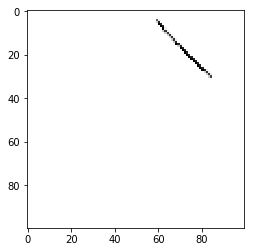

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("./res/simple_line.jpg",0)
plt.imshow(img, cmap="gray")

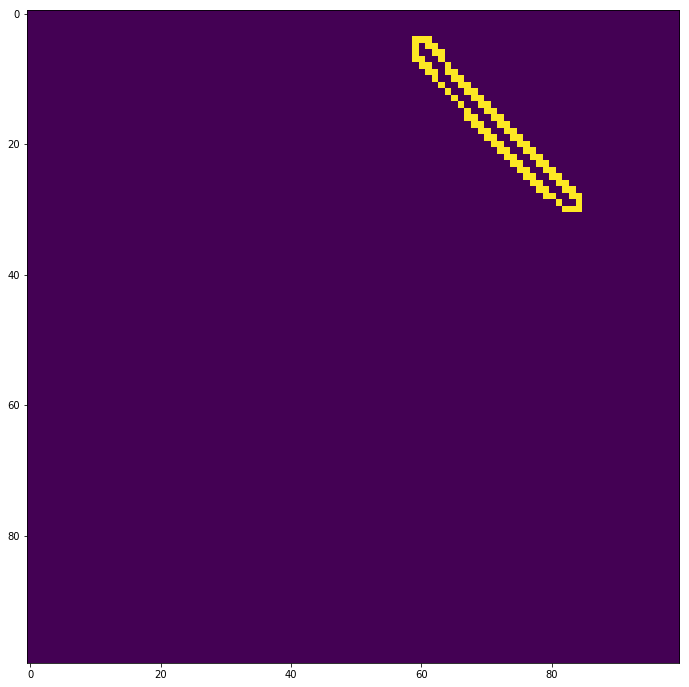

In [2]:
blur = cv2.GaussianBlur(img, (3, 3), 1)
canny = cv2.Canny(blur, 100, 200)
plt.figure(figsize=(12,12))
plt.imshow(canny)


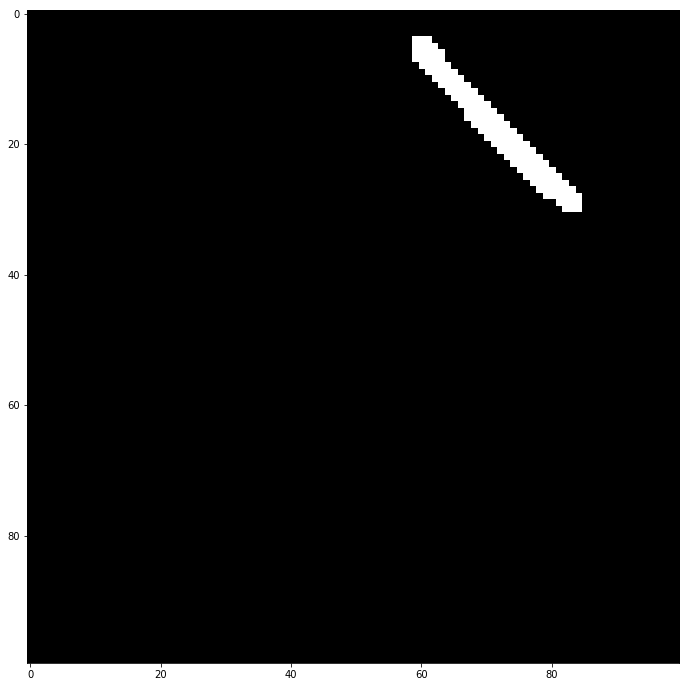

In [3]:

morph = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, np.ones((5,5)))
plt.figure(figsize=(12,12))
plt.imshow(morph, cmap="gray")

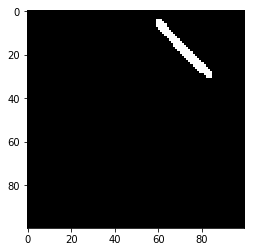

In [4]:
img = cv2.imread("./res/simple_line.jpg",0)
blur = cv2.GaussianBlur(img, (3, 3), 1)
canny = cv2.Canny(blur, 100, 200)
morph = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, np.ones((5,5)))
plt.imshow(morph, cmap="gray")

In [5]:
def hough_acc(edge_img, rho_resolution= 1, theta_resolution = 1):
    rows, cols = edge_img.shape    
    d = np.round(np.sqrt(rows**2 + cols**2))
    thetas = np.arange(-90, 90, theta_resolution)
    rhos = np.arange(-d, d + 1, rho_resolution)
    
    #all cos, sin thetas 0 from 180 degree
    cos_thetas = np.cos(np.deg2rad(thetas))
    sin_thetas = np.sin(np.deg2rad(thetas))
    accumulator = np.zeros((len(rhos), len(thetas)))
    cnt = 0
    for row in range(rows):
        for col in range(cols):
            # if seletecd point is edge
            if edge_img[row, col] != 0:
                cnt += 1
                # check all possible thetas
                for theta_idx in range(len(thetas)):
                    # rho = (x_dist * cos(theta)) + (y_dist * sin(theta))
                    rho =int(d + (col* cos_thetas[theta_idx])+(row *sin_thetas[theta_idx]))
                    accumulator[rho, theta_idx] += 1
    return accumulator, rhos, thetas    

def find_peak(accumulator, rhos, thetas, threhsold=60):
    
    lines = []
    for y in range(accumulator.shape[0]):
        rho = rhos[y]
        for x in range(accumulator.shape[1]):
            if accumulator[y][x] > threhsold:
                theta = np.deg2rad(thetas[x])
                lines.append([rho, theta])
    
    return np.array(lines)

def draw_hough_lines(img, lines):
    res = img.copy()
    for i, line in enumerate(lines):
        rho = line[0]
        theta = line[1]
        # reverse engineer lines from rhos and thetas
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        
        # these are then scaled so that the lines go off the edges of the image
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.circle(res, (int(x0), int(y0)),2,(0,0,255),1)
        cv2.line(res, (x1, y1), (x2, y2), (0, 255, 0), 1)
        plt.imshow(res,cmap="gray")

141.0
[[38.         -0.78539816]]


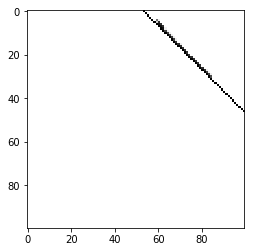

In [6]:
acc, rhos, thetas = hough_acc(morph)
lines = find_peak(acc, rhos,thetas,threhsold=40)
print(lines[:5])
draw_hough_lines(img, lines)

In [7]:
np.rad2deg(-0.78539816)
#

-44.99999980534055

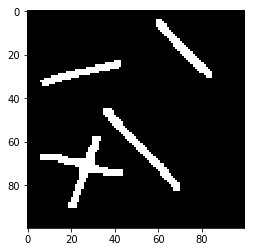

In [10]:
img = cv2.imread("./res/simple_line2.jpg",0)
blur = cv2.GaussianBlur(img, (3, 3), 1)
canny = cv2.Canny(blur, 100, 200)
morph = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, np.ones((5,5)))
plt.imshow(morph, cmap="gray")

141.0
[[-66.          -1.41371669]
 [-66.          -1.3962634 ]
 [-65.          -1.37881011]
 [-65.          -1.36135682]
 [-64.          -1.36135682]]


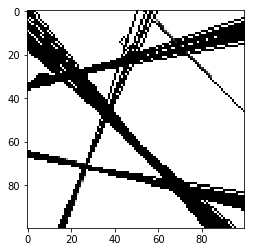

In [15]:
acc, rhos, thetas = hough_acc(morph)
lines = find_peak(acc, rhos,thetas,threhsold=40)
print(lines[:5])
draw_hough_lines(img, lines)

In [16]:
np.rad2deg(-1.41371669)

-80.99999976420456